# Decision trees and Ensemble methods

### Shruti Goyal
### 21BDA51

#### Ques-3) On  a  data  set  of  your  choosing,  fit  a  regression  tree  model.   Show  how pruning can imporve your model.

In [1]:
# Importing Libraries needed for the project. 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve

In [2]:
data=pd.read_csv('C:/Users/91999/Downloads/archive/Life Expectancy Data.csv')

In [3]:
data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [5]:
data.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [6]:
# dropping missing values
data = data.dropna(subset=['GDP', 'Population', 'Hepatitis B', 'Total expenditure'])

In [7]:
data.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [8]:
# function to perform data cleaning on all datasets. 

def wrangle(x):
    x = x.copy()
    
    x.columns = [col.lower()         # make column names lowercase
                .strip('_')         # strip leading/trailing underscores
                .replace('_', ' ')  # replace remaining punctuation with spaces
                .replace('-', ' ') 
                .replace('/', ' ')
                #.replace(' ', '')
                for col in x.columns]
    
    # dropping columns with leakage
    x = x.drop(columns = ['country', 'year', 'income composition of resources',
                         'percentage expenditure', 'infant deaths', 
                          'under five deaths ', 'adult mortality'])
    
    # filling nan values with 0 because I can't do imputation and the missing
    # values can be assumed to be 0.
    
    x = x.fillna(value=0)
    
    return x

### Decision Tree Regression

In [9]:
# clean all data the same way
train, test = train_test_split(data, test_size=0.20, random_state=42)
train = wrangle(train)
test = wrangle(test)

In [10]:
# defining x and y values for training, validation, and test sets. 

target = 'life expectancy '
features = train.columns.drop(target)

x_train = train[features]
y_train = train[target]
x_test = test[features]
y_test = test[target]

In [11]:
x_train.head()

,status,alcohol,hepatitis b,measles,bmi,polio,total expenditure,diphtheria,hiv aids,gdp,population,thinness 1 19 years,thinness 5 9 years,schooling
405,Developing,4.55,91.0,2511,16.6,9.0,7.17,91.0,1.0,575.446453,1565217.0,9.0,8.6,6.3
241,Developed,12.60,98.0,70,63.4,99.0,1.59,99.0,0.1,47439.396840,112957.0,1.0,1.0,16.3
2564,Developing,0.38,81.0,4,33.0,82.0,5.70,86.0,0.3,39.281834,6712841.0,3.9,3.9,10.5
2449,Developing,2.29,98.0,44,17.9,98.0,3.76,98.0,0.1,1644.816372,19668.0,15.4,15.5,13.2
1019,Developing,1.70,84.0,420,23.0,84.0,4.64,84.0,2.9,922.935168,22113425.0,7.9,7.9,8.7


In [12]:
x_test.head()

,status,alcohol,hepatitis b,measles,bmi,polio,total expenditure,diphtheria,hiv aids,gdp,population,thinness 1 19 years,thinness 5 9 years,schooling
758,Developing,0.44,88.0,7,32.2,88.0,8.84,88.0,3.1,1325.997240,851146.0,5.6,5.6,5.5
1984,Developing,0.64,71.0,1,41.9,67.0,5.92,72.0,1.5,854.346921,647272.0,1.4,1.4,8.2
1018,Developing,1.25,94.0,6,23.6,94.0,5.30,94.0,2.6,19.686718,227212.0,7.7,7.6,9.1
389,Developed,10.80,95.0,22004,62.7,94.0,7.24,94.0,0.1,6843.263289,7395599.0,2.0,2.0,13.9
1739,Developing,6.17,93.0,0,57.8,95.0,6.13,95.0,0.1,7325.734740,616969.0,2.1,2.1,14.2


In [13]:
x_train.dtypes

status                    object
alcohol                  float64
hepatitis b              float64
measles                    int64
 bmi                     float64
polio                    float64
total expenditure        float64
diphtheria               float64
 hiv aids                float64
gdp                      float64
population               float64
 thinness  1 19 years    float64
 thinness 5 9 years      float64
schooling                float64
dtype: object

In [14]:
# use one hot encoding to encode object to integer.

import category_encoders as ce
encoder = ce.OneHotEncoder(use_cat_names=True)
x_train2 = encoder.fit_transform(x_train)
x_test2 = encoder.transform(x_test)

In [15]:
x_train2.head()

,status_Developing,status_Developed,alcohol,hepatitis b,measles,bmi,polio,total expenditure,diphtheria,hiv aids,gdp,population,thinness 1 19 years,thinness 5 9 years,schooling
405,1,0,4.55,91.0,2511,16.6,9.0,7.17,91.0,1.0,575.446453,1565217.0,9.0,8.6,6.3
241,0,1,12.60,98.0,70,63.4,99.0,1.59,99.0,0.1,47439.396840,112957.0,1.0,1.0,16.3
2564,1,0,0.38,81.0,4,33.0,82.0,5.70,86.0,0.3,39.281834,6712841.0,3.9,3.9,10.5
2449,1,0,2.29,98.0,44,17.9,98.0,3.76,98.0,0.1,1644.816372,19668.0,15.4,15.5,13.2
1019,1,0,1.70,84.0,420,23.0,84.0,4.64,84.0,2.9,922.935168,22113425.0,7.9,7.9,8.7


In [16]:
#build the model, we import decision tree regressor from SKLEARN

from sklearn.tree import DecisionTreeRegressor

In [17]:
# instantiate the model

dt = DecisionTreeRegressor(random_state=42)

In [18]:
# fit the tree model through the x_training data

dt.fit(x_train2, y_train)

DecisionTreeRegressor(random_state=42)

In [19]:
# use the model to get a prediction. 

y_pred_dt = dt.predict(x_test2)

In [20]:
y_pred_dt[:5]

array([61.8, 62.4, 58.6, 73.2, 72.9])

In [21]:
# get error metrics to evaluate model. 

from sklearn.metrics import mean_absolute_error, r2_score
mae = mean_absolute_error(y_test, y_pred_dt)
mae

2.3810810810810814

In [22]:
# r2 score using sklearn metrics r2 score library
r2 = r2_score(y_test, y_pred_dt)
r2

0.6340378935276874

In [23]:
# r2 score using decision tree regressor scoring method. 
dt.score(x_test2, y_test)

0.6340378935276874

In [24]:
columns = x_train2.columns

In [25]:
importance = dt.feature_importances_
importance

array([0.00460371, 0.00450844, 0.02540833, 0.00751566, 0.01640495,
       0.0312343 , 0.00469847, 0.03167802, 0.00462043, 0.58133561,
       0.00962038, 0.00933086, 0.03361856, 0.0133489 , 0.22207338])

In [26]:
combo = pd.Series(importance, columns)
combo

status_Developing        0.004604
status_Developed         0.004508
alcohol                  0.025408
hepatitis b              0.007516
measles                  0.016405
 bmi                     0.031234
polio                    0.004698
total expenditure        0.031678
diphtheria               0.004620
 hiv aids                0.581336
gdp                      0.009620
population               0.009331
 thinness  1 19 years    0.033619
 thinness 5 9 years      0.013349
schooling                0.222073
dtype: float64

Text(0.5, 1.0, 'Visualization of decision tree model feature imporances')

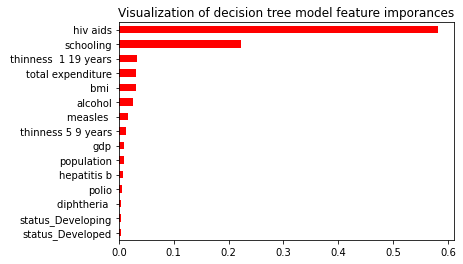

In [27]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(6,4))

combo.sort_values().plot.barh(color='red')
plt.title('Visualization of decision tree model feature imporances')

### Hyperparameter tuning with GridSearchCV

In [28]:
param_grid = {"criterion": ["mse", "mae"],
              "min_samples_split": [10, 20, 40],
              "max_depth": [2, 6, 8],
              "min_samples_leaf": [20, 40, 100],
              "max_leaf_nodes": [5, 20, 100],
              }


grid_cv_dt = GridSearchCV(dt, param_grid, cv=5)

grid_cv_dt.fit(x_train2, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42),
             param_grid={'criterion': ['mse', 'mae'], 'max_depth': [2, 6, 8],
                         'max_leaf_nodes': [5, 20, 100],
                         'min_samples_leaf': [20, 40, 100],
                         'min_samples_split': [10, 20, 40]})

In [29]:
print("R-Squared::{}".format(grid_cv_dtm.best_score_))
print("Best Hyperparameters::\n{}".format(grid_cv_dtm.best_params_))

NameError: name 'grid_cv_dtm' is not defined

In [30]:
df = pd.DataFrame(data=grid_cv_dt.cv_results_)

[Text(0.5, 1.0, 'Effect of Depth and Leaf Nodes on Model Performance')]

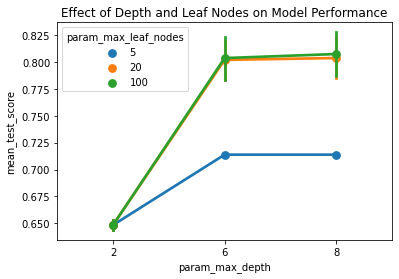

In [31]:
fig,ax = plt.subplots()
sns.pointplot(data=df[['mean_test_score',
                           'param_max_leaf_nodes',
                           'param_max_depth']],
             y='mean_test_score',x='param_max_depth',
             hue='param_max_leaf_nodes',ax=ax)
ax.set(title="Effect of Depth and Leaf Nodes on Model Performance")

In [32]:
# Checking the training model scores
r2_scores = cross_val_score(grid_cv_dt.best_estimator_, x_train2, y_train, cv=10)
mse_scores = cross_val_score(grid_cv_dt.best_estimator_, x_train2, y_train, cv=10,scoring='neg_mean_squared_error')

print("avg R-squared::{:.3f}".format(np.mean(r2_scores)))
print("MSE::{:.3f}".format(np.mean(mse_scores)))

avg R-squared::0.851
MSE::-11.100


#### As we can see the accuracy we got earlier was approx 63% but after hyperparameter tuning the accuracy is improved to 85%.